In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Use seaborn plotting defaults 
import seaborn as sns; sns.set()

Working with Perfectly Linear Dataset

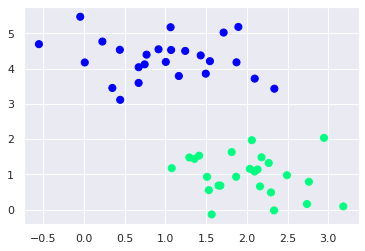

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.show()

In [3]:
# support vector classifier
from sklearn.svm import SVC
model =SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

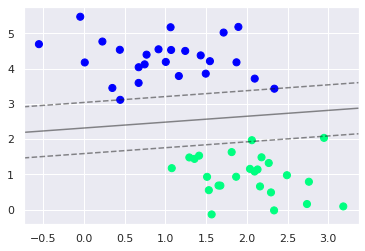

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

The importance of Support Vectors 

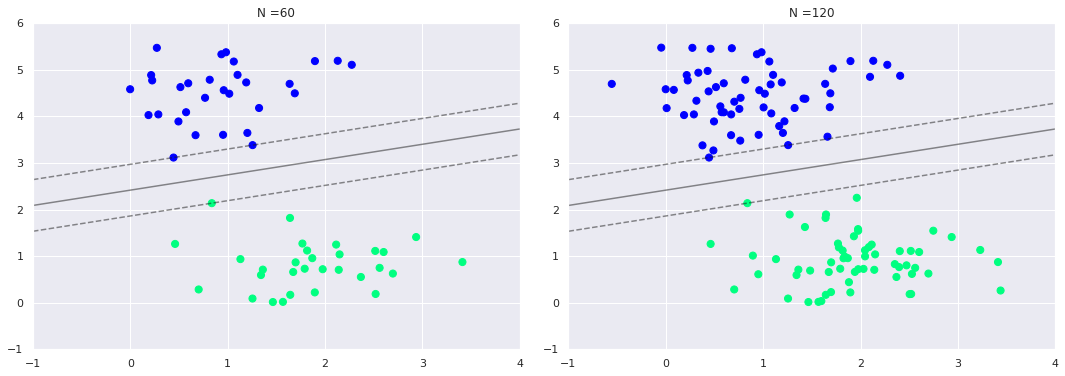

In [6]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, 
                     random_state =0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel ='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N ={0}'.format(N))

Working with Almost Linearly Seperable Datasets 

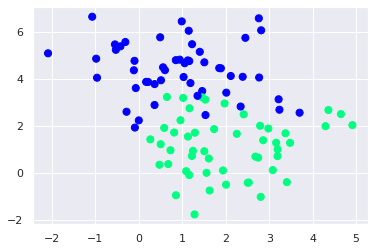

In [7]:
X, y = make_blobs(n_samples=100, centers=2, 
                 random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

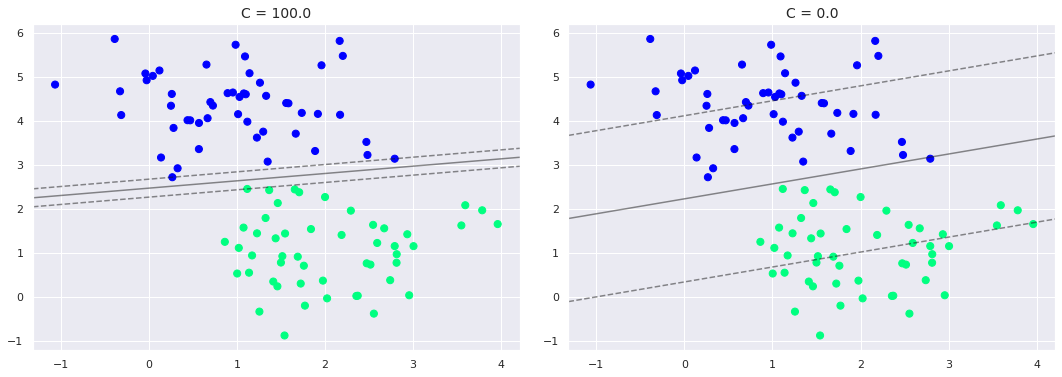

In [8]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right= 0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s =300, lw=1, facecolor='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Kernel Trick SVM

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

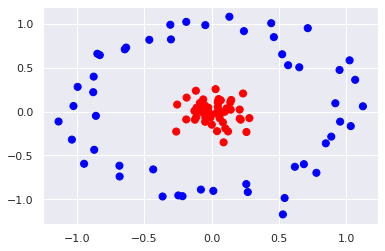

In [11]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [13]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


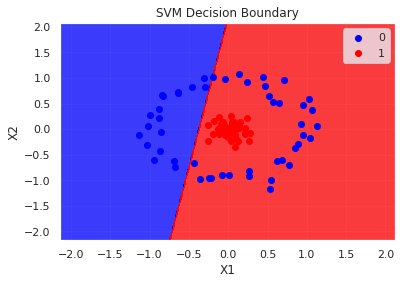

In [20]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()
plot_decision_boundary(X, y, classifier)

In [21]:
def plot_3d_plot(X, y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

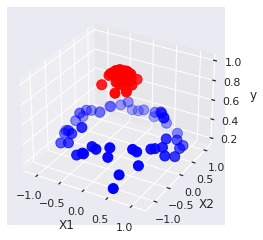

In [22]:
plot_3d_plot(X, y)

In [23]:
rbf_classifier = SVC(kernel ='rbf')
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


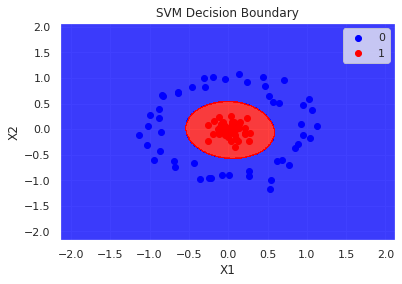

In [25]:
plot_decision_boundary(X, y, rbf_classifier)


In [26]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


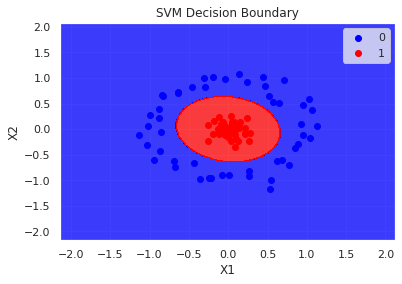

In [28]:
plot_decision_boundary(X, y, poly_classifier)

In [29]:
X

array([[ 1.12456041e+00,  6.11524626e-02],
       [ 1.32796869e-02, -9.04656497e-01],
       [ 8.42415835e-02, -1.22212307e-01],
       [-1.02572682e+00,  6.41801106e-02],
       [-6.44789549e-01,  7.11253849e-01],
       [ 2.59374439e-01, -2.32243275e-01],
       [-1.99848280e-02, -1.09977201e-02],
       [ 3.36399022e-02, -1.95782226e-02],
       [ 6.18985459e-01, -6.29534457e-01],
       [ 2.19411423e-03, -1.48963044e-01],
       [-1.87984565e-01, -8.87886712e-02],
       [-8.59230322e-01, -4.78137954e-02],
       [ 6.87698431e-02,  1.30063346e-01],
       [-8.48263705e-01,  6.61397224e-01],
       [-1.27383729e-01,  8.80628020e-03],
       [-4.33472223e-01, -6.59382200e-01],
       [ 9.88840026e-02, -9.33427515e-04],
       [ 6.51861097e-01,  5.06832508e-01],
       [-8.71762162e-01, -4.35427691e-01],
       [ 2.40572177e-01,  9.19588127e-01],
       [-7.56201339e-03, -6.68131938e-02],
       [-9.57904620e-02,  1.86595055e-02],
       [ 1.03428025e+00, -1.65125789e-01],
       [ 2.

In [30]:
np.exp(-(X**2)).sum(1)

array([1.27860938, 1.44095908, 1.97810362, 1.34508762, 1.26281636,
       1.88242982, 1.99947974, 1.99848576, 1.35451106, 1.97804958,
       1.95742647, 1.47565327, 1.97850768, 1.13265391, 1.98382678,
       1.47610301, 1.99026873, 1.42728185, 1.29497304, 1.37304947,
       1.99548876, 1.99051804, 1.31620106, 1.36087409, 1.16104493,
       1.00745735, 1.99508688, 1.00266722, 1.98256947, 1.99060795,
       1.25377739, 1.90453083, 1.34125432, 1.20176861, 1.36388365,
       1.29481253, 1.96951677, 1.47817566, 1.93534704, 1.20537927,
       1.99490867, 1.94088259, 1.18193074, 1.29150484, 1.95667366,
       1.9349617 , 1.24391824, 1.32248533, 1.19629702, 1.37436946,
       1.9868093 , 1.26212601, 1.96128496, 1.88318505, 1.44020788,
       1.93035097, 1.93098218, 1.95365795, 1.98328244, 1.99639869,
       1.99920776, 1.87635285, 1.29143755, 1.41999192, 1.99291358,
       1.28398098, 1.44688241, 1.9764284 , 1.26734849, 1.91852988,
       1.41031744, 1.95082083, 1.3885051 , 1.98441563, 1.31776

In [31]:
X_new=np.exp(-(X**2))

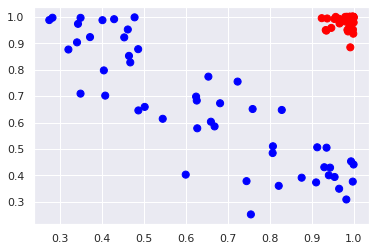

In [32]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')